In [17]:
import os

import numpy as np
import matplotlib.pyplot as plt
import generator
import seaborn as sns

sns.set_style("dark")

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
def resample(samples, orig_rate, new_rate, dtype=np.float64, channels=1, quality="linear"):
    orig_file = "orig.raw"
    new_file = "new.raw"

    samples.astype(dtype).tofile(orig_file)
    !go run ../cmd/resampler/main.go -ir {orig_rate} -or {new_rate} -ch {channels} -q {quality} {orig_file} {new_file}
    resampled = np.fromfile(new_file, dtype=dtype)

    os.remove(orig_file)
    os.remove(new_file)
    return resampled

In [50]:
def visualize(orig_rate, new_rate, wave_gen, ax=None, plot_base=True, label="Resampled", **kvargs):
    orig_samples = wave_gen.sample(orig_rate)
    new_samples = resample(orig_samples, orig_rate, new_rate, **kvargs)
    perfect_samples = wave_gen.sample(1000)

    orig_time = generator.get_time(orig_rate, len(orig_samples))
    new_time =  generator.get_time(new_rate, len(new_samples))
    perfect_time =  generator.get_time(1000, len(perfect_samples))

    if ax is None:
        plt.figure(figsize=(18, 6))
        ax = plt.axes()
    if plot_base:
        ax.scatter(orig_time, orig_samples, label="original samples")
        ax.plot(perfect_time, perfect_samples, label="original signal")
    ax.scatter(new_time, new_samples, label=label)
    


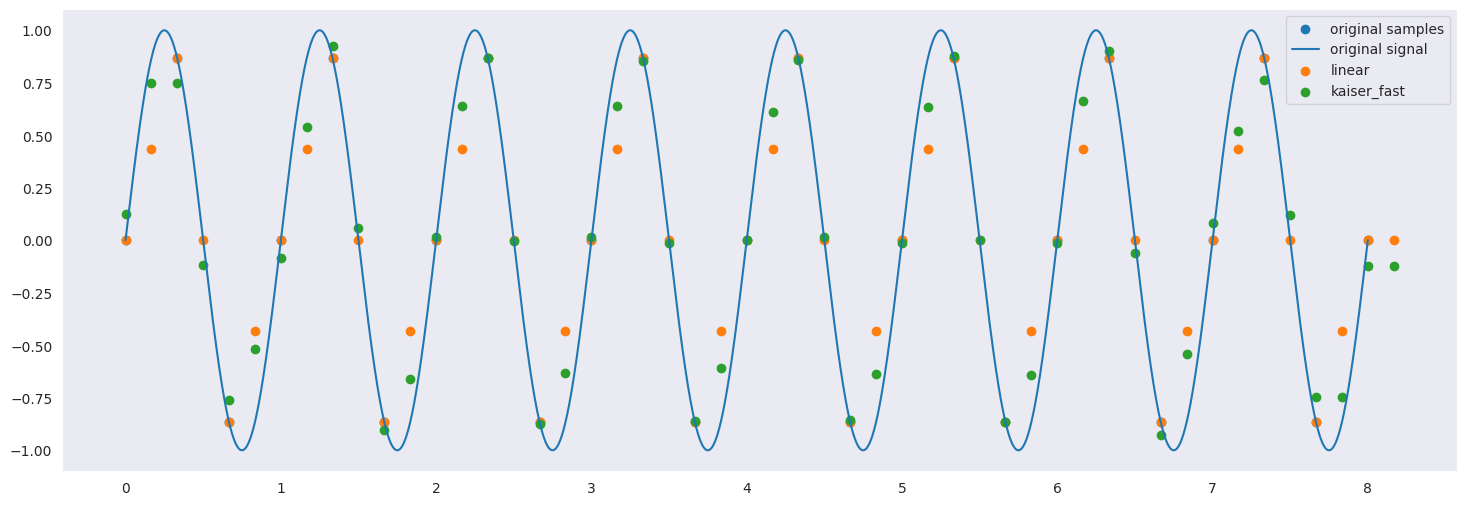

In [51]:
plt.figure(figsize=(18, 6))
ax = plt.axes()
visualize(3, 6, generator.Sine(length=8), ax, label="linear")
visualize(3, 6, generator.Sine(length=8), ax, label="kaiser_fast", plot_base=False, quality="kaiser_fast")
plt.legend()